<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Bella_Ciao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install pygal

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18, 7)

In [49]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/money%20heist%20-%20all%20seasons.csv'
df = pd.read_csv(url,encoding='latin-1')
df.head(10)

,Season,Episode,Name,On Air,Year,IMDB,Watch Time (minutes),Summary
0,1,1,Efectuar lo acordado,02-May-17,2017,8.4,47,The Professor recruits a young female robber a...
1,1,2,Imprudencias letales,09-May-17,2017,8.4,41,Hostage negotiator Raquel makes initial contac...
2,1,3,Misfire,16-May-17,2017,8.2,50,Police grab an image of the face of one of the...
3,1,4,Caballo de Troya,23-May-17,2017,8.3,51,Raquel is adversely affected by a personal cri...
4,1,5,El día de la marmota,30-May-17,2017,8.4,42,A sudden development in the investigation and ...
5,1,6,La cálida Guerra Fría,06-Jun-17,2017,8.3,43,The problems inside and outside the National C...
6,1,7,Refrigerada inestabilidad,13-Jun-18,2017,8.4,47,A new police plan will make Raquel enter the N...
7,1,8,Tú lo has buscado,20-Jun-19,2017,8.2,43,Despite the setbacks and to keep more than 60 ...
8,1,9,El que la sigue la consigue,27-Jun-20,2017,8.7,42,The professor talks with Raquel's mother on st...
9,2,1,Se acabaron las máscaras,16-Oct-17,2017,8.6,54,The police finds the house where The Professor...


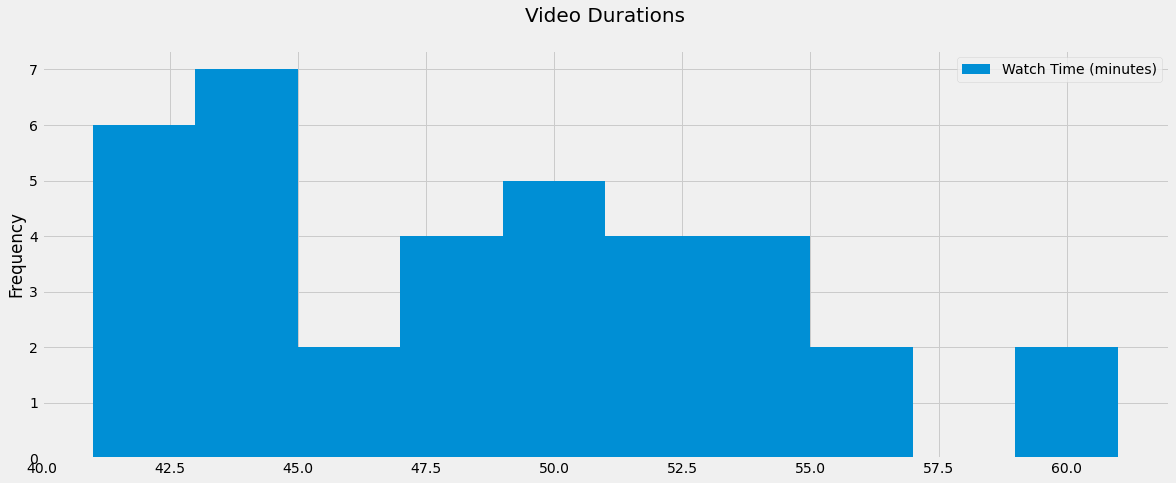

In [50]:
df.iloc[:,6:7].plot.hist()
plt.title('Video Durations\n',size=20)
plt.show()

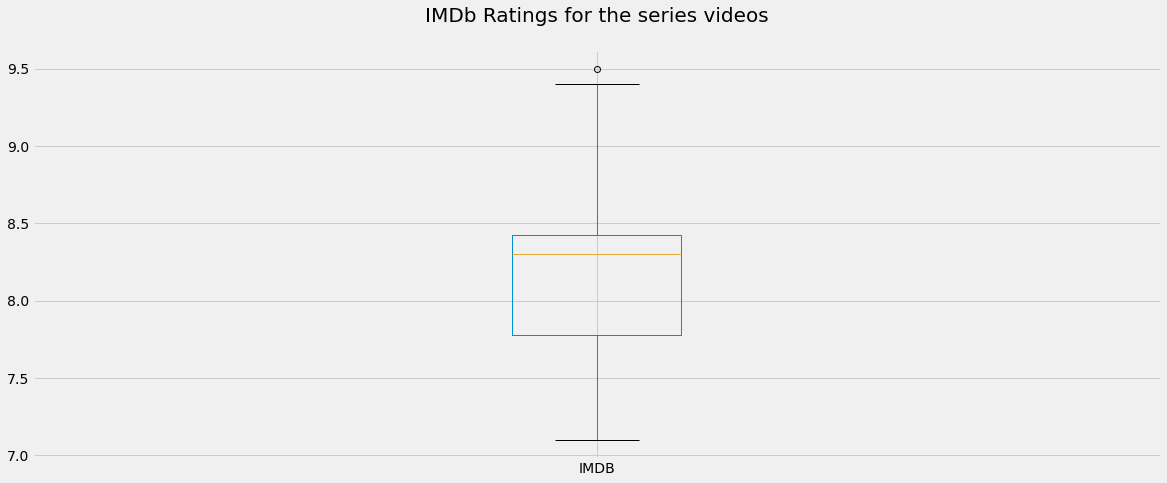

In [51]:
df["IMDB"].plot.box()
plt.title("IMDb Ratings for the series videos\n",size=20)
plt.show()

In [52]:
r,c = df.shape
print("Number of videos = ",r)
print("Number of attributes =",c)

Number of videos =  36
Number of attributes = 8


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                36 non-null     int64  
 1   Episode               36 non-null     int64  
 2   Name                  36 non-null     object 
 3   On Air                36 non-null     object 
 4   Year                  36 non-null     int64  
 5   IMDB                  36 non-null     float64
 6   Watch Time (minutes)  36 non-null     int64  
 7   Summary               36 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.4+ KB


In [54]:
df.isnull().sum()

Season                  0
Episode                 0
Name                    0
On Air                  0
Year                    0
IMDB                    0
Watch Time (minutes)    0
Summary                 0
dtype: int64

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,36.0,2.833333,1.404076,1.0,1.750,3.0,4.000,5.0
Episode,36.0,4.250000,2.322253,1.0,2.000,4.0,6.000,9.0
Year,36.0,2018.666667,1.549193,2017.0,2017.000,2019.0,2020.000,2021.0
IMDB,36.0,8.188889,0.588838,7.1,7.775,8.3,8.425,9.5
Watch Time (minutes),36.0,48.222222,5.361829,41.0,43.000,47.5,52.000,61.0


In [56]:
# Judgement parameters
df.columns 

Index(['Season ', 'Episode ', 'Name', 'On Air', 'Year', 'IMDB',
       'Watch Time (minutes)', 'Summary'],
      dtype='object')

In [57]:
# Seasons of the series
df['Season '].unique().tolist()

[1, 2, 3, 4, 5]

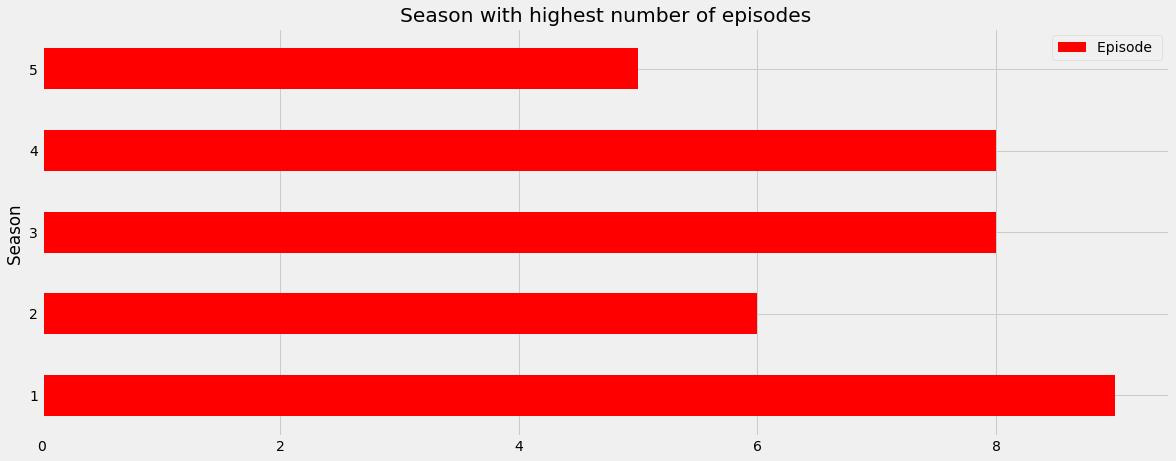

In [58]:
df1=df.groupby("Season ").count().iloc[:,0:1]
df1.plot(kind="barh",color="red",title=("Season with highest number of episodes"))
plt.show()

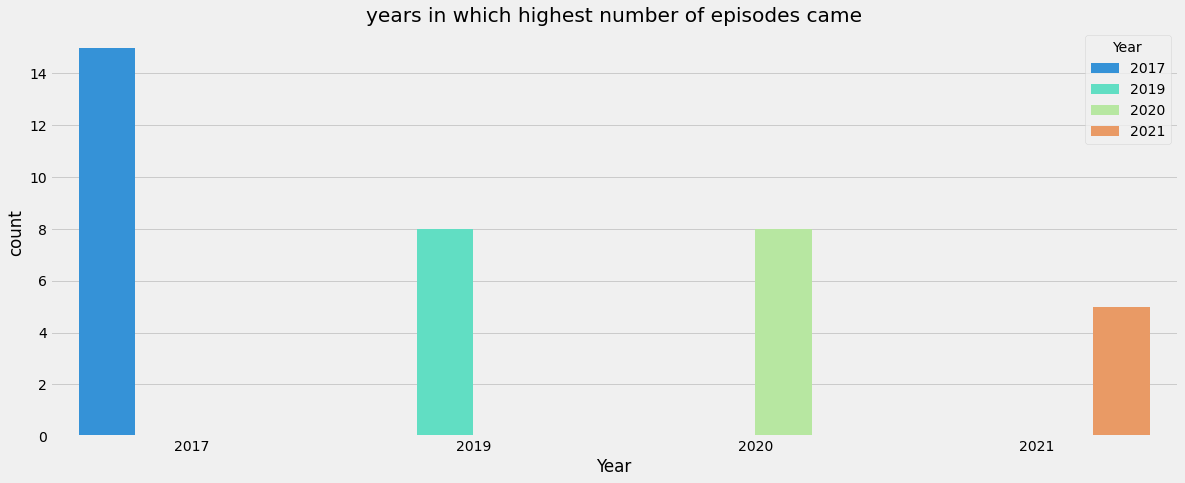

In [59]:
sns.countplot(x="Year",data=df,palette="rainbow",hue="Year")
plt.title("years in which highest number of episodes came")
plt.show()

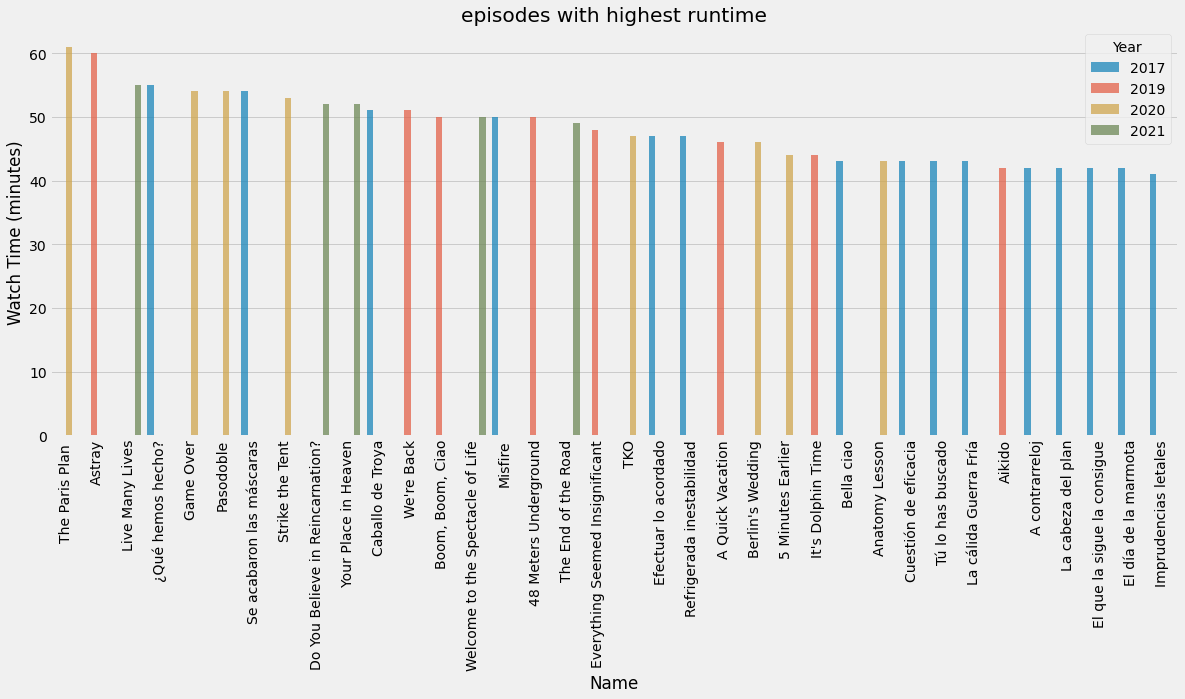

In [60]:
sns.barplot(x="Name",y="Watch Time (minutes)",data=df.sort_values("Watch Time (minutes)",ascending=False),hue="Year",alpha=0.75);plt.xticks(rotation=90)
plt.title("episodes with highest runtime")
plt.show()

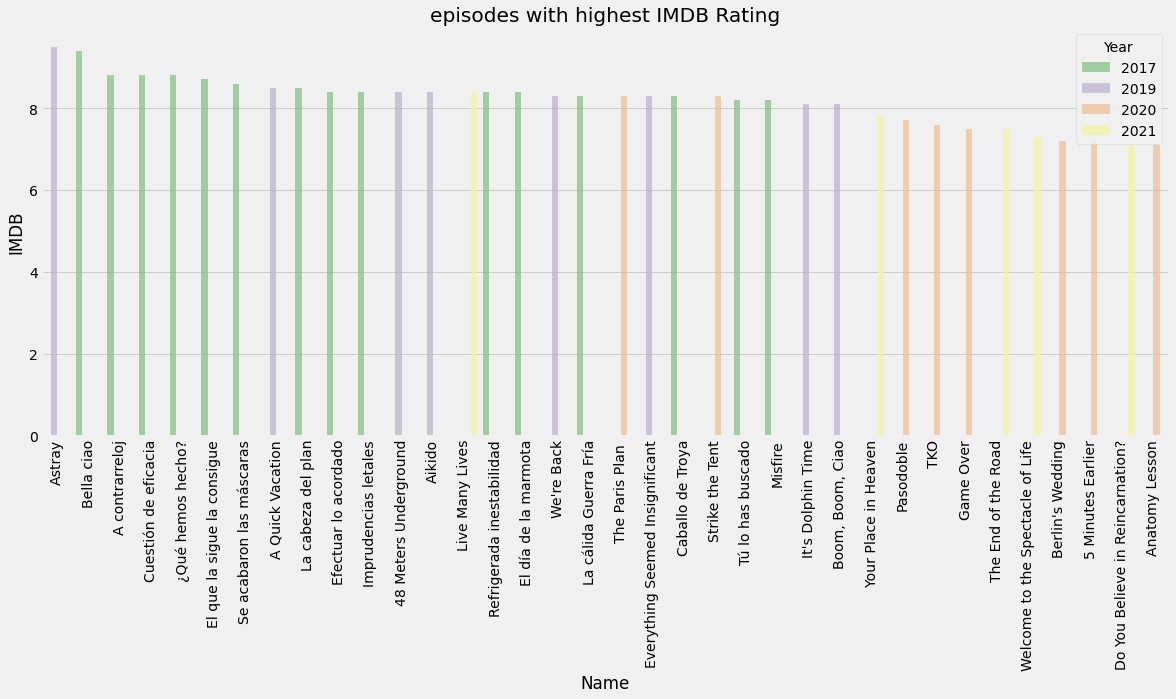

In [61]:
sns.categorical.barplot(x="Name",y="IMDB",data=df.sort_values("IMDB",ascending=False),hue="Year",alpha=0.75,palette="Accent");plt.xticks(rotation=90)
plt.title("episodes with highest IMDB Rating")
plt.show()

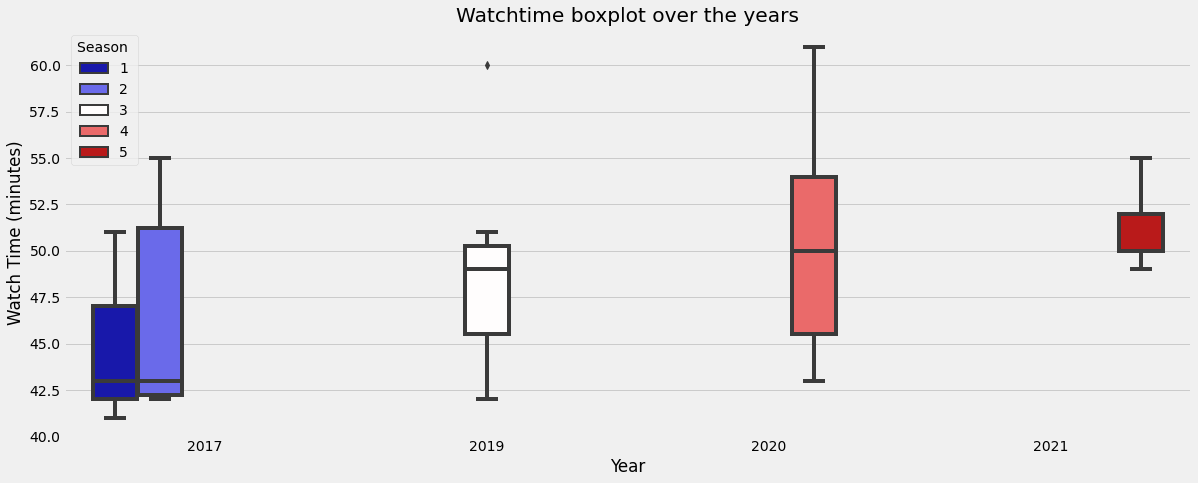

In [62]:
sns.boxplot(x="Year",y="Watch Time (minutes)",data=df,palette='seismic',hue="Season ")
plt.title("Watchtime boxplot over the years")
plt.show()

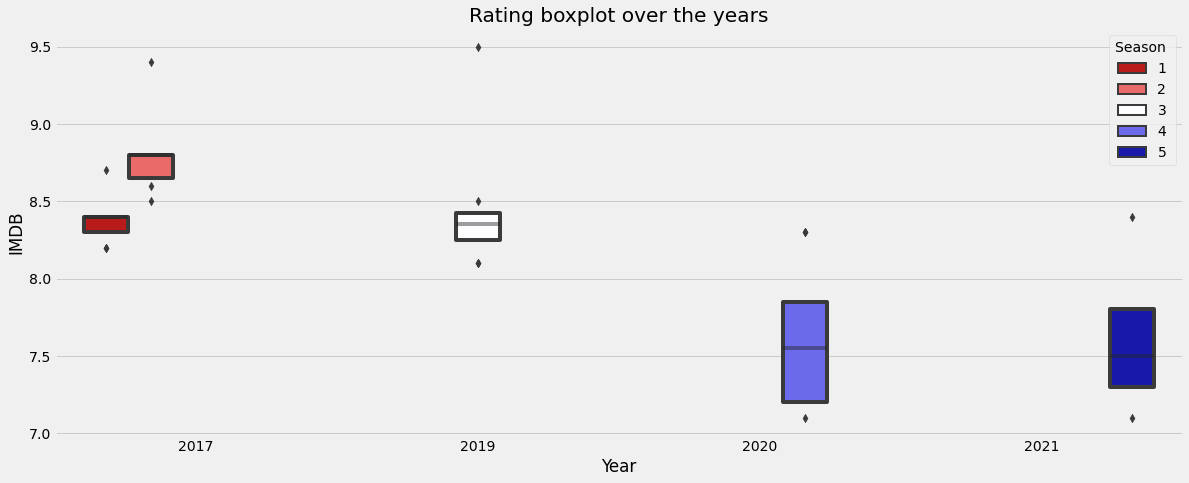

In [63]:
sns.boxenplot(x="Year",y="IMDB",data=df,palette='seismic_r',hue="Season ")
plt.title("Rating boxplot over the years")
plt.show()

In [64]:
df[["Season ","IMDB","Watch Time (minutes)"]].groupby("Season ").mean()

,IMDB,Watch Time (minutes)
Season,,
1,8.366667,45.111111
2,8.816667,46.500000
3,8.450000,48.875000
4,7.612500,50.250000
5,7.620000,51.600000


In [65]:
df[["Season ","Watch Time (minutes)"]].groupby("Season ").sum()["Watch Time (minutes)"].rename("Watch Time (minutes)'s sum'")
data=pd.DataFrame({"Watch Time (minutes)'s sum":df[["Season ","Watch Time (minutes)"]].groupby("Season ").sum()["Watch Time (minutes)"].rename("Watch Time (minutes)'s sum'").values},index=[1,2,3,4,5])
print(data)

   Watch Time (minutes)'s sum
1                         406
2                         279
3                         391
4                         402
5                         258


In [66]:
df_1=df[["Year","IMDB","Watch Time (minutes)"]]
df1=df_1.groupby("Year").mean()
df1["MEAN of WatchTime"]=df1["Watch Time (minutes)"]
df1=df1.drop(columns="Watch Time (minutes)")
df1

,IMDB,MEAN of WatchTime
Year,,
2017,8.546667,45.666667
2019,8.450000,48.875000
2020,7.612500,50.250000
2021,7.620000,51.600000


In [67]:
df2=df_1.drop(columns=["IMDB"])
df2=df2.groupby("Year").sum()
df2=pd.DataFrame({"Sum of WatchTime":list(df2["Watch Time (minutes)"].rename("sum of WatchTime").values)},index=[2017,2019,2020,2021])
df_3=pd.concat([df1,df2],axis=1)
df_3.style.highlight_max(color="orange")

,IMDB,MEAN of WatchTime,Sum of WatchTime
2017,8.546667,45.666667,685
2019,8.450000,48.875000,391
2020,7.612500,50.250000,402
2021,7.620000,51.600000,258


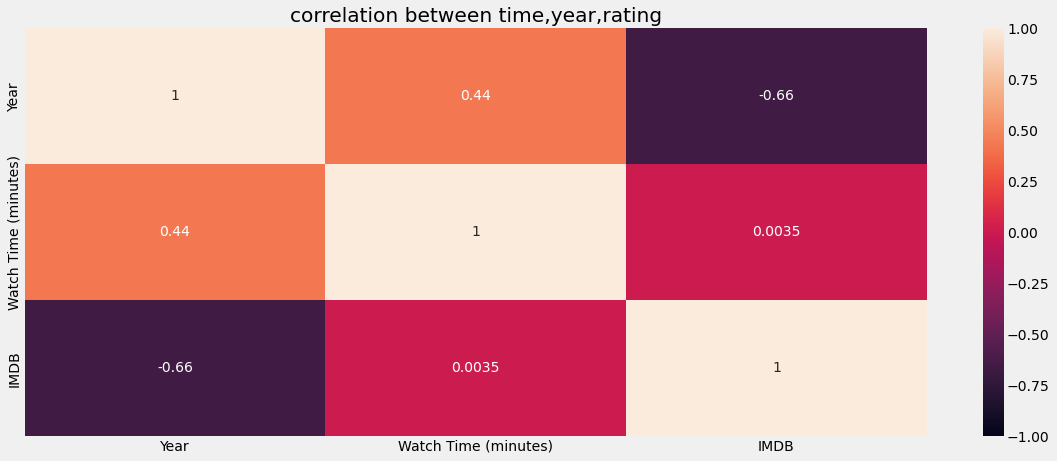

In [68]:
sns.heatmap(df[["Year","Watch Time (minutes)","IMDB"]].corr(),annot=True,vmax=1,vmin=-1)
plt.title("correlation between time,year,rating")
plt.show()

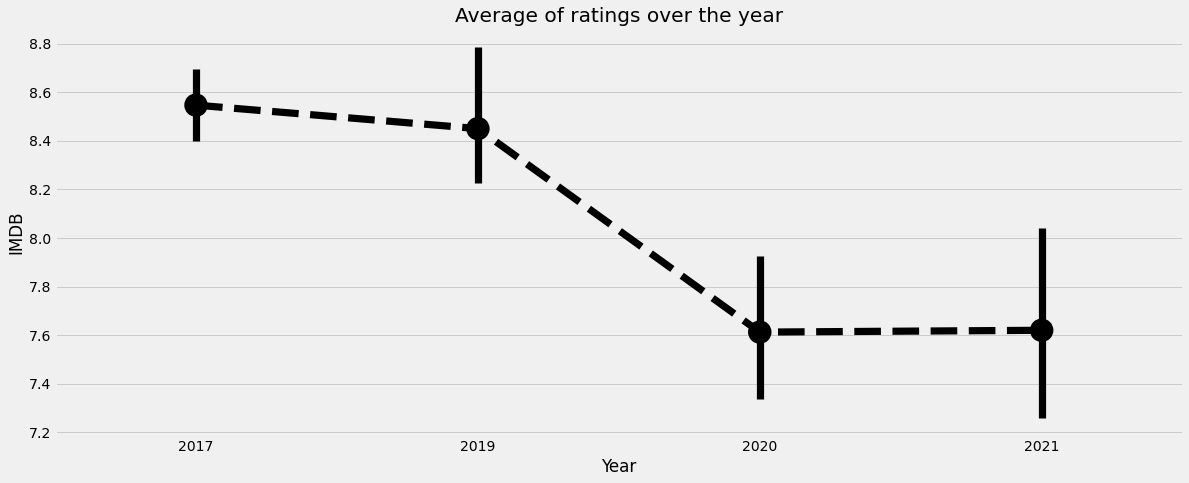

In [69]:
sns.pointplot(x="Year",y="IMDB",data=df,linestyles="dashed",color="k")
plt.title("Average of ratings over the year")
plt.show()

In [70]:
a =rating_overyws
list(round(a,2) for a in a)

[8.37, 8.82, 8.45, 7.61, 8.37]

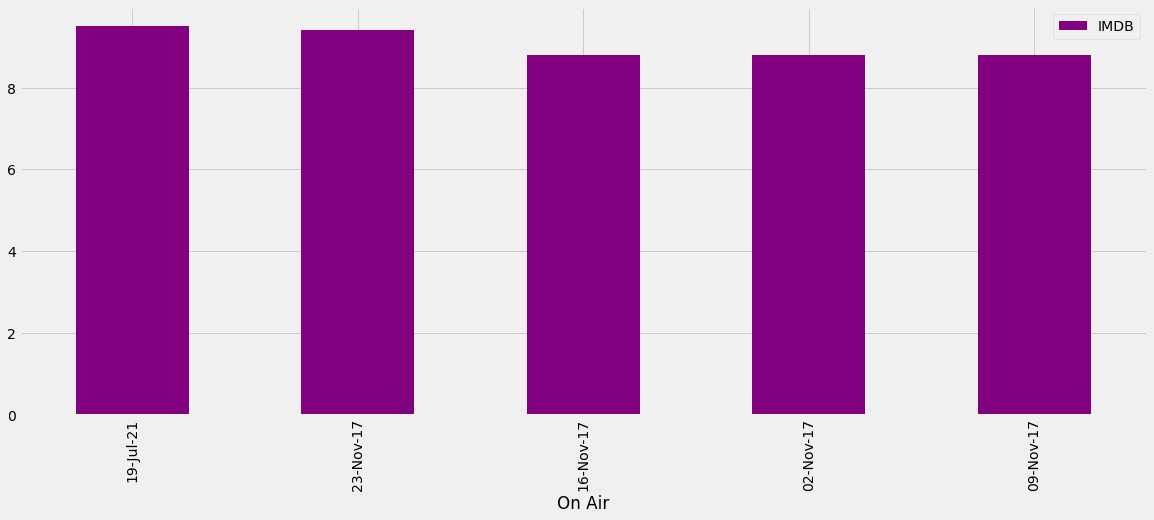

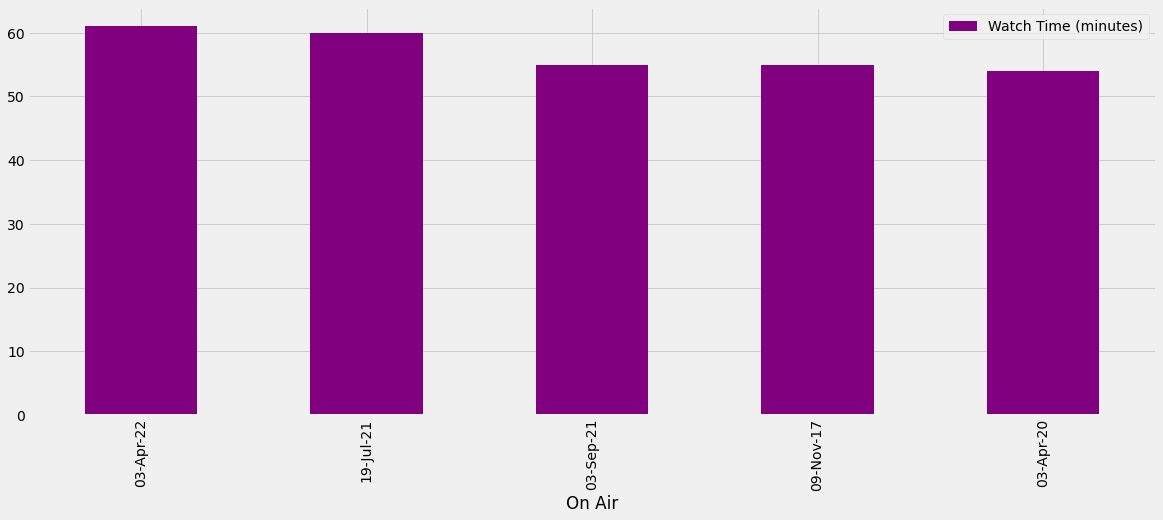

In [71]:
ex_df=df[["On Air","IMDB","Watch Time (minutes)"]]

for i in ex_df.columns.tolist()[1:]:
    ex_df.sort_values(i,ascending=False).head().plot(x="On Air",y=i,kind="bar",color=["purple"])